

> **Feature Selection in Machine Learning :**
Feature selection is the process of choosing the most important features (variables) from a dataset to improve a machine learning model's performance and efficiency. Instead of using all the features, we select only the most relevant ones that contribute significantly to predictions.


> **Why do we need feature selection ?**
- Reduces Overfitting 📉 : Too many irrelevant features can make a model complex and cause it to overfit the training data.
-Improves Model Performance 🚀 : Selecting relevant features boosts accuracy and reduces unnecessary noise in the data.
- Reduces Training Time ⏳ : Fewer features mean faster model training and lower computational cost.
-Enhances Interpretability 🔍 : Helps in understanding which features actually impact predictions.

> **Types of Feature Selection Methods :**
- Type => Filter Methods:
  - Method => Correlation, Chi-Square, Mutual Information.
  - Description => Rank features based on statistical tests.
- Type => Wrapper Methods:
  - Method => Forward/Backward Selection, Recursive Feature Elimination (RFE)
  - Description => Train models with different feature subsets and select the best.
- Type => Embedded Methods :
  - Method =>Lasso Regression, Decision Trees
  - Description =>Feature selection is built into the model training process.




In [9]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import seaborn as sns



> **Filter Method :**
- how the variables are dependent


In [10]:
# step 1 : create a sample dataset
np.random.seed(42)
data = pd.DataFrame({
    'Size' : np.random.randint(1000, 5000,100), # square feet
    'Bedrooms' : np.random.randint(1,5,100), # number of bedrooms
    'Age' : np.random.randint(1,50,100), # age of the house
    'Price' : np.random.randint(100000,500000,100) # house price
})

In [11]:
data.head()

,Size,Bedrooms,Age,Price
0,4174,2,32,486393
1,4507,2,39,134754
2,1860,4,49,326814
3,2294,2,32,337714
4,2130,2,4,242483


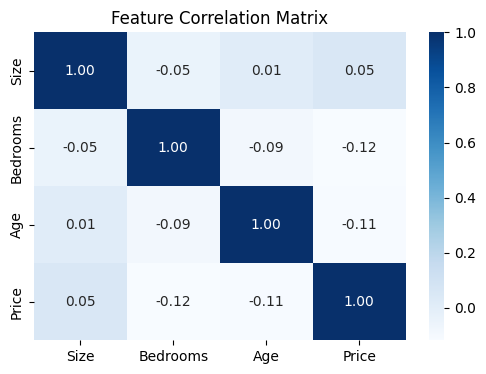

In [12]:

# step 2 : compute correlation (filter method)
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(),annot=True,cmap='Blues',fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()



> **Wrapper Method :**
- most two important features


In [14]:
# step 3 : apply recursive feature elimination (wrapper method)
x= data.drop(columns =['Price'])  # features
y = data['Price']   # target variable

model = RandomForestRegressor()
rfe = RFE(model,n_features_to_select=2)  # select top 2 features
x_selected = rfe.fit_transform(x,y)

print('Selected Features using RFE : ',x.columns[rfe.support_])

Selected Features using RFE :  Index(['Size', 'Age'], dtype='object')




> **Embedded Method (Lasso Regression):**



In [15]:
# step 4 : Apply Lasso (least absolute shrinkage and selection operator) Regression (embedded method)
lasso = Lasso(alpha = 0.1)
lasso.fit(x,y)
importance = np.abs(lasso.coef_)
# display feature importance
selected_features = x.columns[importance > 0]
print('Selected Features using Lasso Regression : ',selected_features)

Selected Features using Lasso Regression :  Index(['Size', 'Bedrooms', 'Age'], dtype='object')


In [16]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso